<a href="https://colab.research.google.com/github/nadeem53/Data-analyst/blob/main/Titanic_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Acquisition:** "I obtained the Titanic dataset from Kaggle and imported it into my data analysis environment."

**Data Exploration:** "To understand the dataset, I conducted an initial exploration. This involved examining the structure, checking for missing values, and assessing the data types of each column."

**Data Cleaning:** "During data cleaning, I addressed missing values ,removed outliers that could affect analysis, and ensured data consistency by".

**Feature Engineering:** "I performed feature engineering to enhance the dataset's relevance to the analysis."

**Data Visualization:** "To gain insights from the data, I created various visualizations".

**Analysis Goals:** "My analysis aimed to answer questions such as [Check the survival rate according to age, gender, Pclass, fare etc.] using the Titanic dataset."



In [ ]:
# import some librries that are use in this task
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# upload data set in csv formate. name i select titanic_data
titanic_data = pd.read_csv("/content/titanic_dataset.csv")

In [ ]:
# Explore data set
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# check total features/columns
titanic_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#check the information of whole data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# checking the missing values in data sets
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

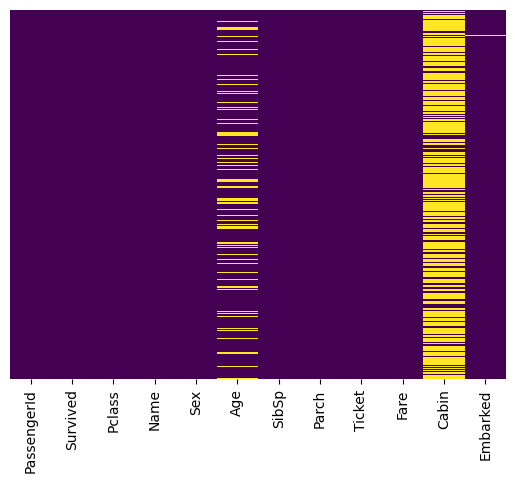

In [ ]:
#check the missing values in data sets with heatmap
sns.heatmap(titanic_data.isnull(),yticklabels= False, cbar = False, cmap = 'viridis')

We know there are some columns like (Age, Cabin, Embarked) have missing values. Now we check the missing values from specific column.

In [ ]:
#Check missing values in Age column
titanic_data['Age'].isnull().sum()

177

In [ ]:
# check missing value in Cabin column
titanic_data['Cabin'].isnull().sum()

687

In [ ]:
# check missing values in Embarked column
titanic_data['Embarked'].isnull().sum()

2

The above output shows the counting of missing values in all columns that have missing values.

The next step we handled the missing values.


In [ ]:
# fill the missing values in age feature
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [ ]:
# now check Age column after fill missing values
titanic_data['Age'].isnull().sum()

0

In [ ]:
# check and fill the cabin column
titanic_data['Cabin'].value_counts().head(1)
titanic_data['Cabin'].fillna('C', inplace=True)

In [ ]:
# check again cabin column
titanic_data['Cabin'].isnull().sum()

0

In [ ]:
# delete null values in embarked column bcoz there is short null values
titanic_data = titanic_data.dropna(subset=['Embarked'])

In [ ]:
titanic_data['Embarked'].isnull().sum()

0

**we almost deal with all null values in all columns. Lets check with various methods.**

In [ ]:
# check the null values in all datasets
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: >

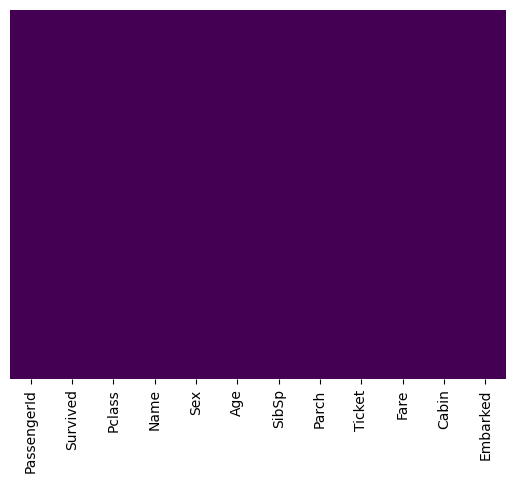

In [ ]:
# now check null values with plot as we check earlier
sns.heatmap(titanic_data.isnull(), yticklabels= False, cbar = False, cmap = 'viridis')

**The above plot shows we deal with all null values. Now there is no null values in our datasets.**

In [ ]:
# check is there any column corelated
titanic_data.corr()

<ipython-input-23-c5f17a69cb9f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


<ipython-input-24-ca744cfa7140>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(), annot = True)


<Axes: >

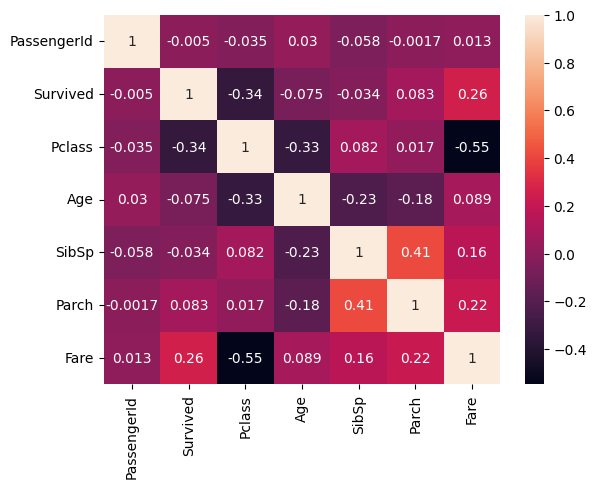

In [ ]:
# check corelation with heatmap
sns.heatmap(titanic_data.corr(), annot = True)

**This plot show there is no feature/ columns are highly corelate**d.

In [ ]:
# check the sets of survived column. We need this to predict.
set(titanic_data['Survived'])

{0, 1}

<Axes: xlabel='Survived', ylabel='count'>

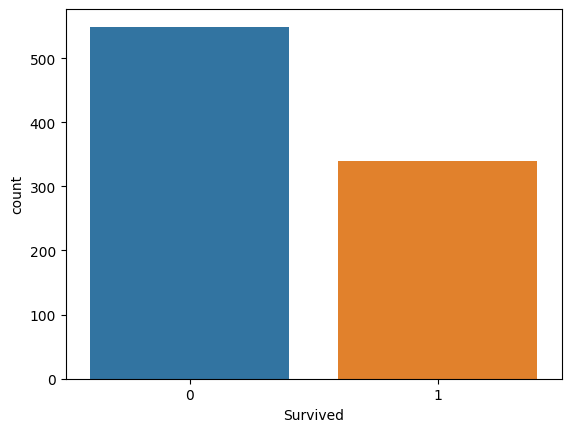

In [ ]:
# Lets look the survival ratio with countplot
sns.countplot(x = 'Survived', data = titanic_data)

<ipython-input-27-2137a5917e8f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data['Fare'], hist = False)


<Axes: xlabel='Fare', ylabel='Density'>

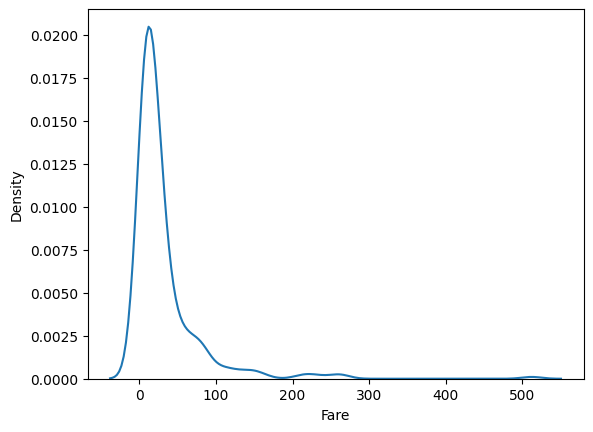

In [ ]:
# now we are checking the fare ratio of the passengers
sns.distplot(titanic_data['Fare'], hist = False)

**This plot shows more people travel with cheaper ticket.It means more people travel in low class.**

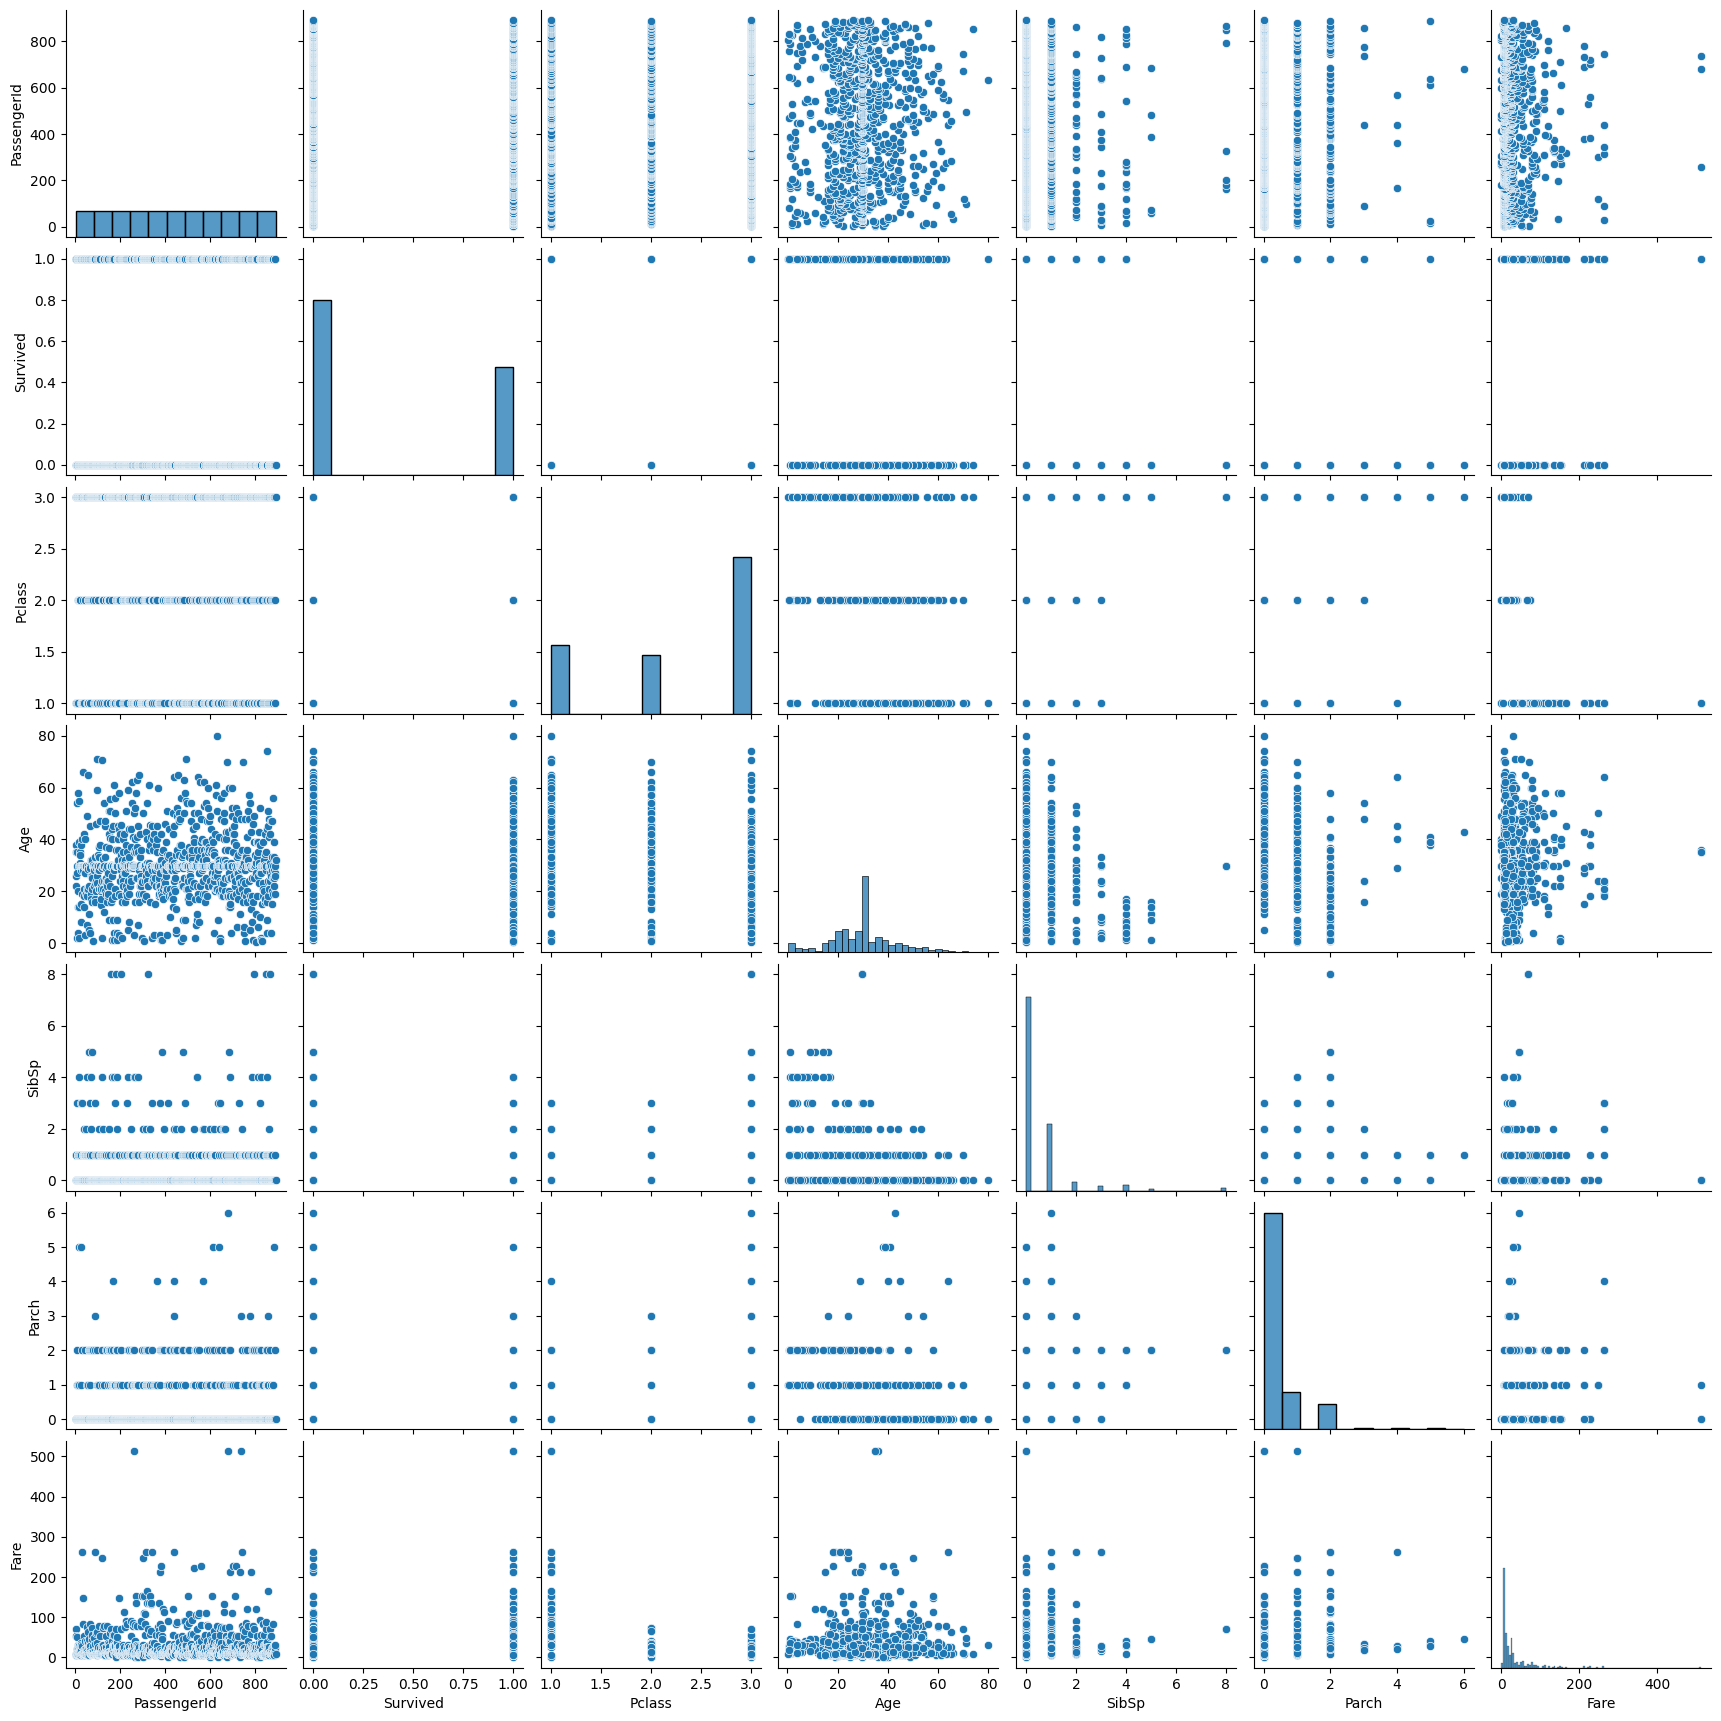

In [ ]:
#This is pairplot to showa all datsets
sns.pairplot(titanic_data)

In [ ]:
# det of Pclass
set(titanic_data['Pclass'])

{1, 2, 3}

        Survived
Pclass          
1       0.626168
2       0.472826
3       0.242363


<Axes: xlabel='Pclass'>

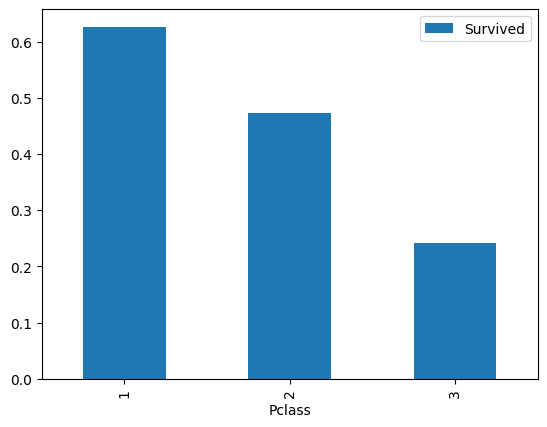

In [ ]:
# impact of Pclass on survival
print(titanic_data[['Pclass','Survived']].groupby(['Pclass']).mean())

p = titanic_data.pivot_table(index = "Pclass", values = 'Survived')
p.plot.bar()

**Above plot shows that people of upper class have higher survival rate.**

In [ ]:
#set of sex column
set(titanic_data['Sex'])

{'female', 'male'}

        Survived
Sex             
female  0.740385
male    0.188908


<Axes: xlabel='Survived', ylabel='count'>

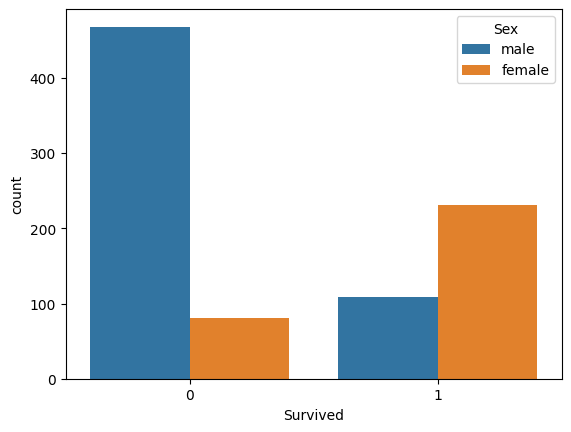

In [ ]:
# check the survival rate according to sex
print(titanic_data[['Sex','Survived']].groupby(['Sex']).mean())

sns.countplot(x = 'Survived', hue = 'Sex', data = titanic_data)

<Axes: xlabel='SibSp', ylabel='count'>

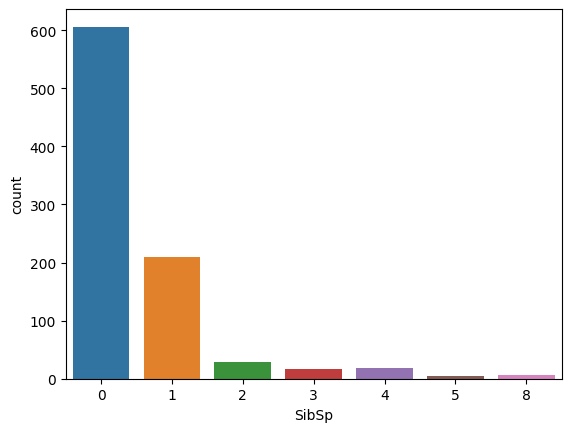

In [ ]:
sns.countplot(x='SibSp',data=titanic_data)

**It shows most people onboard did not have neither a child nore having spouse.**